# Aula 08

Nas aulas passadas começamos a trabalhar com o dataset do Titanic, fizemos a etapa de processamento e começamos a estudar as estatísticas descritivas do conjunto de dados.

In [1]:
import pandas as pd
import requests
from io import StringIO
import re

# Criação do dataFrame dos alunos
# ID do arquivo no Google Drive
file_id = '1S5Nl793vcL5ZPTGjzKaIEbwbLaDplvIP'

# URL modificada para forçar o download do arquivo
url = f"https://drive.google.com/uc?id={file_id}"

# Tentando obter o arquivo com requests
try:
    response = requests.get(url)
    response.raise_for_status()  # Lança um erro para respostas não-sucedidas
    # Usando StringIO para converter o texto em um arquivo em memória e, então, lendo com o Pandas
    csv_raw = StringIO(response.text)
    data = pd.read_csv(csv_raw)
except requests.RequestException as e:
    print(f"Erro ao acessar o arquivo: {e}")


#Transformando o PassengerId no índice
data = data.set_index("PassengerId")

#Criando uma função que encontra os pronomes de tratamentos dos passageiros
def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

#Aplicando a função na coluna de nomes, isto é, criando uma coluna só com os pronomes de tratamentos
data['Title'] = data['Name'].apply(extract_title)

#Substituindo os valores ausentes das idades pela mediana agrupada por sexo e classe de passageiro
data['Age'] = data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

#Substituindo os valores ausentes do porto de embarque pelo valor que mais apareceu
data['Embarked'] = data['Embarked'].fillna('S')

#Substituindo os valores ausentes da cabine com base na Classe e no mapa do navio
for num in [1, 2, 3]:
    if num == 1:
        data.loc[data['Pclass'] == 1, 'Cabin'] = data.loc[data['Pclass'] == 1, 'Cabin'].fillna('ABC')
    elif num == 2:
        data.loc[data['Pclass'] == 2, 'Cabin'] = data.loc[data['Pclass'] == 2, 'Cabin'].fillna('DE')
    elif num == 3:
        data.loc[data['Pclass'] == 3, 'Cabin'] = data.loc[data['Pclass'] == 3, 'Cabin'].fillna('FG')


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
 11  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,FG,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,FG,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,FG,S,Mr


As medidas de tendência central, por si só, não são suficientes para fornecer uma descrição completa dos dados. É essencial considerar também as medidas de variabilidade, que quantificam a dispersão dos pontos de dados em relação à média. Nesta seção, você aprenderá a identificar e calcular as principais medidas de variabilidade:

- Variância
- Desvio padrão
- Assimetria
- Amplitude
- Curtose


## Medidas de Dispersão

### Variância

A variância é uma medida estatística que indica a dispersão dos valores em um conjunto de dados. Ela calcula o quão distante cada ponto de dados está da média do conjunto, proporcionando uma visão da variabilidade geral. A variância é geralmente representada pelo símbolo σ².

**Exemplo 1:**  Determine a variância das idades dos passageiros do Titanic:

In [4]:
data["Age"].var()

177.00769995914197

In [7]:
data.groupby(["Sex","Pclass"])["Age"].var()

Sex     Pclass
female  1         167.370053
        2         161.301184
        3         114.469296
male    1         189.662852
        2         200.492869
        3         108.135613
Name: Age, dtype: float64

### Desvio Padrão

O **desvio padrão** da amostra é uma importante medida de dispersão dos dados, intimamente relacionada à variância da amostra. O desvio padrão, representado por \(s\), é obtido ao se calcular a raiz quadrada positiva da variância da amostra. Essa medida é frequentemente preferida à variância, pois é expressa na mesma unidade que os dados originais, facilitando a interpretação. Após calcular a variância, o desvio padrão pode ser facilmente determinado usando Python.

**Exemplo 2:** Calcule o desvio padrão das idades dos passageiros do Titanic.

In [10]:
data["Age"].std()

13.304424074688162

In [11]:
data.groupby(["Sex","Pclass"])["Age"].std()

Sex     Pclass
female  1         12.937158
        2         12.700440
        3         10.699032
male    1         13.771814
        2         14.159550
        3         10.398827
Name: Age, dtype: float64

### Distribuição de Frequência

A distribuição de frequência é uma ferramenta estatística essencial para analisar e visualizar como os dados estão distribuídos ao longo de diferentes categorias ou intervalos contínuos. Ela permite observar a frequência com que determinados valores ou grupos de valores ocorrem dentro de um conjunto de dados, facilitando a identificação de padrões e a compreensão da estrutura dos dados.

A construção de uma distribuição de frequência pode ser realizada através da tabulação dos dados em classes, que podem ser definidas por intervalos de valores. Cada classe contém uma contagem de quantas vezes valores dentro daquele intervalo aparecem no conjunto de dados, conhecida como frequência. A representação visual dessas frequências, geralmente por meio de histogramas (ou gráficos de barras), proporciona uma compreensão clara e imediata das características principais dos dados, como a concentração de observações em determinados intervalos.

**Exemplo 3:** Construa um histograma para visualizar a distribuição de frequência das idades dos passageiros do Titanic.

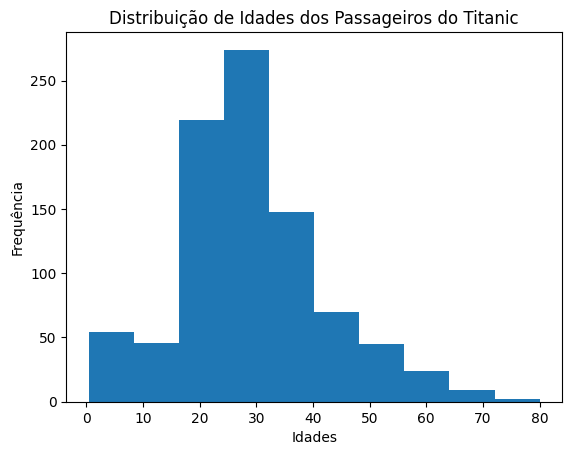

In [19]:
import matplotlib.pyplot as plt

plt.hist(data["Age"])
plt.title('Distribuição de Idades dos Passageiros do Titanic')
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.show()

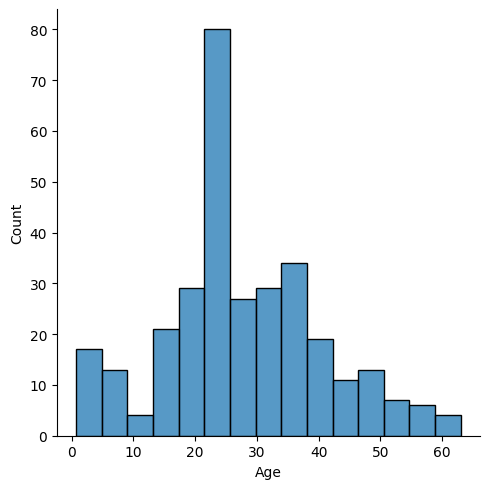

In [43]:
import seaborn as sns

group_fem = data[data["Sex"]=='female']["Age"]

sns.displot(group_fem, bins = 15)

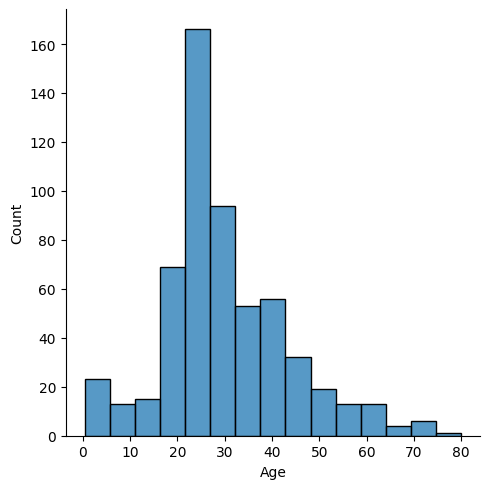

In [44]:
group_masc = data[data["Sex"]=='male']["Age"]

sns.displot(group_masc, bins = 15)

**Observação:** É importante selecionar adequadamente o número e a amplitude das classes na distribuição de frequência. Classes muito amplas podem ocultar variações significativas nos dados, enquanto classes muito estreitas podem resultar em uma visualização fragmentada que dificulta a análise.

### O Box-Plot

O box-plot é uma ferramenta gráfica essencial na estatística descritiva, fornecendo uma visão clara da distribuição dos dados, bem como de sua concentração e dispersão. Este gráfico destaca quão distantes os valores extremos estão em relação ao corpo principal dos dados, facilitando a identificação de outliers.

Um box-plot é estruturado a partir de cinco valores chave: o mínimo, o primeiro quartil (Q1), a mediana (Q2), o terceiro quartil (Q3) e o máximo. Esses pontos são utilizados para construir o gráfico e comparar a distribuição de diferentes conjuntos de dados.

Para desenhar um box-plot, posiciona-se uma caixa retangular sobre um eixo numérico, que pode ser horizontal ou vertical. Os extremos da caixa são definidos pelos primeiro e terceiro quartis, encapsulando aproximadamente 50% dos dados entre eles. Os "bigodes" do box-plot se estendem desde a caixa até os valores mínimo e máximo, excluindo outliers, que são marcados separadamente. A linha dentro da caixa indica a mediana, fornecendo uma rápida visualização do valor central dos dados.

O box-plot é uma ferramenta poderosa para uma análise rápida e eficaz, permitindo comparações diretas entre diferentes grupos de dados e ajudando a destacar características como simetria e dispersão de maneira intuitiva e imediata.

<Axes: xlabel='Age'>

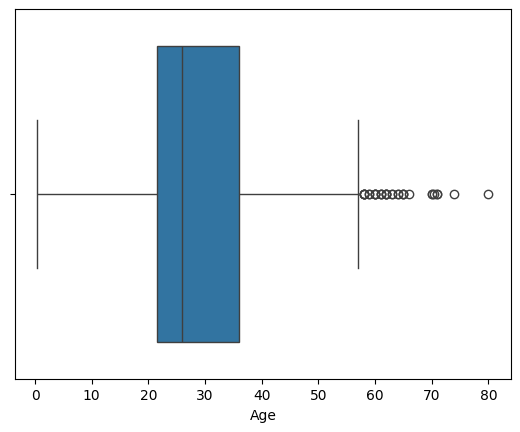

In [51]:
import seaborn as sns
sns.boxplot(x= data.Age)

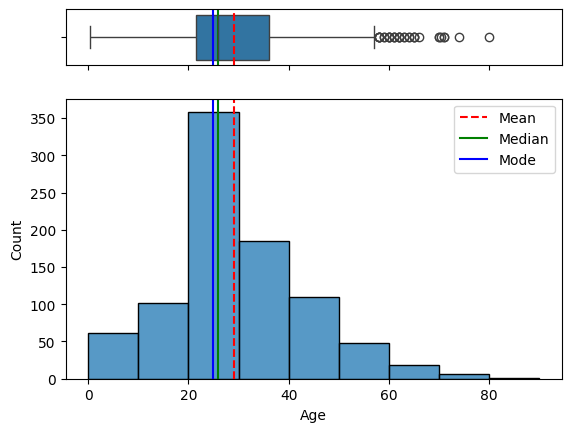

In [52]:
import matplotlib.pyplot as plt


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data['Age'].mean()
median=data['Age'].median()
mode=data['Age'].mode().values[0]

sns.boxplot(x= data.Age, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data.Age, bins = [0,10,20,30,40,50,60,70,80,90], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

### Assimetria

A assimetria é uma medida que indica o grau de desvio na simetria de uma distribuição de dados. Ela é particularmente relevante quando se avalia a adequação de um modelo estatístico, pois uma distribuição assimétrica pode violar as suposições de normalidade do modelo e afetar a interpretação da importância de uma variável independente. Em termos simples, a assimetria quantifica o quanto a distribuição de uma característica se afasta de uma distribuição perfeitamente simétrica.

**Observação:** Valores negativos de assimetria indicam a presença de uma cauda dominante à esquerda da distribuição, como ilustrado no primeiro conjunto de dados. Por outro lado, valores positivos indicam uma cauda mais longa ou mais espessa à direita, conforme demonstrado no segundo conjunto. Uma assimetria próxima de zero (por exemplo, entre -0,5 e 0,5) sugere que a distribuição é relativamente simétrica.

**Exemplo 4:** Determine o coeficiente de assimetria para as idades dos passageiros do Titanic.

In [46]:
data["Age"].skew()

0.5340834483875482

### Amplitude

Amplitude é uma medida de dispersão estatística que indica a diferença entre o maior e o menor valor em um conjunto de dados. Essa métrica é particularmente útil para entender a escala total dentro da qual os dados variam, oferecendo uma visão rápida da extensão dos valores observados.

Para calcular a amplitude, simplesmente subtraímos o valor mínimo do valor máximo encontrado no conjunto de dados. Apesar de sua simplicidade, a amplitude tem limitações significativas, principalmente porque é extremamente sensível a valores atípicos (outliers). Um único valor extremamente alto ou extremamente baixo pode distorcer a percepção da variação geral dos dados.

Apesar de ser uma medida básica, a amplitude é um ponto de partida valioso para análises mais profundas de dados, especialmente quando combinada com outras medidas de tendência central e dispersão, como a média, mediana, variância e desvio padrão.


In [50]:
data["Age"].max() - data["Age"].min()

79.58

### Curtose

Curtose é uma medida estatística que descreve o "achatamento" ou "pico" de uma distribuição em relação à distribuição normal. Outliers em uma amostra impactam a curtose de forma mais significativa do que afetam a assimetria, pois, numa distribuição simétrica, caudas mais pesadas em ambos os extremos elevam a curtose. Em contraste com a assimetria, onde as caudas opostas podem se neutralizar, na curtose ambas contribuem para seu aumento. Diferentemente da média e do desvio padrão, que são expressos nas mesmas unidades dos dados, e da variância, que é expressa no quadrado dessas unidades, a curtose é uma medida adimensional. Ela representa um coeficiente que indica o grau de achatamento da distribuição dos dados.

**Exemplo 5:** Determine a curtose das idades dos passageiros do Titanic.

In [47]:
data["Age"].kurtosis()

0.7170673791661373


O padrão de referência para a curtose é a distribuição normal, que tem uma curtose de 3. Por esse motivo, 
frequentemente utiliza-se o termo **excesso de curtose**, que é calculado como curtose menos 3.

- **Mesocúrtica**: Uma distribuição é classificada como mesocúrtica quando sua curtose é aproximadamente igual a 3 (ou um excesso de curtose próximo de 0, usando a medida do pandas). Essa distribuição tem uma forma semelhante à distribuição normal em termos de "pico".

- **Platicúrtica**: Uma distribuição com curtose menor que 3 (ou excesso de curtose negativo no pandas) é chamada de platicúrtica. Comparada à distribuição normal, ela tende a ter caudas mais curtas e finas e um pico central mais baixo e largo.

- **Leptocúrtica**: Quando a curtose é maior que 3 (ou excesso de curtose positivo no pandas), a distribuição é classificada como leptocúrtica. Esse tipo de distribuição possui caudas mais longas e gordas, com um pico central mais alto e agudo em comparação com uma distribuição normal.


Ao analisar a assimetria e a curtose das idades, observamos que os dados não estão distribuídos de maneira centralizada e apresentam uma forma verticalmente alongada. Para obter uma visualização mais precisa da distribuição dos dados, é útil empregar uma curva conhecida como **função densidade de probabilidade**. Essa curva suaviza os picos e vales dos histogramas ao passar pelas diferentes classes de dados, oferecendo uma representação contínua e detalhada da distribuição.

Existem diversos métodos para estimar essa curva, e um dos mais eficazes é a **Estimativa de Densidade por Kernel (KDE)**. Este método, disponível na biblioteca Seaborn, permite uma aproximação suave da distribuição de frequência, utilizando uma combinação de curvas de "Kernel" que se sobrepõem para modelar a densidade de probabilidade de forma mais orgânica.

Para aplicar a KDE e visualizar a forma dos dados de maneira mais intuitiva, podemos usar o Seaborn, uma biblioteca gráfica especializada em gráficos estatísticos para Python. Utilizando a função `sns.kdeplot`, é possível gerar uma representação visual detalhada e facilmente interpretável da distribuição dos dados.



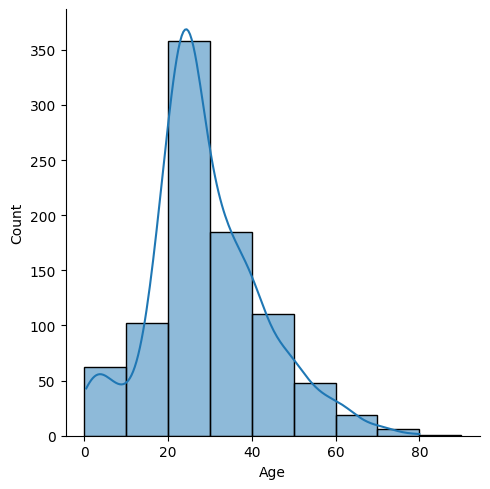

In [49]:
sns.displot(data.Age, bins = [0,10,20,30,40,50,60,70,80,90], kde= True)